In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from wordcloud import WordCloud
plt.rc('figure',figsize=(15,10))

In [11]:
r_data = pd.read_csv('/kaggle/input/ramen-ratings-latest-update-jan-25-2020/Ramen_ratings_2020.csv')
r_data.head(3)

,ID,URL,Brand,Variety,Style,Country,Stars
0,3473,https://www.theramenrater.com/2020/04/05/3473-...,MyKuali,White Fish Broth Noodle,Pack,Malaysia,5
1,3472,https://www.theramenrater.com/2020/04/05/3472-...,MyKuali,Penang White Curry Noodle (New Recipe),Pack,Malaysia,5
2,3471,https://www.theramenrater.com/2020/04/05/3471-...,Ve Wong,Instant Oriental Noodles Soup Chinese Herb - G...,Pack,Taiwan,3.75


In [12]:
r_data.Style.fillna(r_data.Style.mode()[0],inplace=True)

In [13]:
Style_dict = {r_data.Style.unique()[i]: i+1 for i in range(0,len(r_data.Style.unique()))}
Brand_dict = {r_data.Brand.unique()[i]: i+1 for i in range(0,len(r_data.Brand.unique()))}
Country_dict = {r_data.Country.unique()[i]: i+1 for i in range(0,len(r_data.Country.unique()))}

org_data = r_data.copy()
r_data.Style.replace(Style_dict,inplace=True)
r_data.Brand.replace(Brand_dict,inplace=True)
r_data.Country.replace(Country_dict,inplace=True)
r_data = r_data[r_data['Stars'] != 'Unrated']
r_data.head(3)

,ID,URL,Brand,Variety,Style,Country,Stars
0,3473,https://www.theramenrater.com/2020/04/05/3473-...,1,White Fish Broth Noodle,1,1,5
1,3472,https://www.theramenrater.com/2020/04/05/3472-...,1,Penang White Curry Noodle (New Recipe),1,1,5
2,3471,https://www.theramenrater.com/2020/04/05/3471-...,2,Instant Oriental Noodles Soup Chinese Herb - G...,1,2,3.75


In [14]:
#Variety Feature Extraction

#number of words extraction
def number_of_words(sir):
    return len(sir.split(' '))
r_data['Number_Of_Words'] = r_data.Variety.apply(number_of_words)

meat_types = ['chicken','beef','duck','pork','shrimp','turkey']
noodle_types = ['udon','soba','ramen','egg','shirataki','hokkien','noodles']

def contain_flavor(sir):
    stn = sir.lower()
    return 1 if 'flavor' in stn else 0

def meat_scanner(sir):
    stn = sir.lower()
    for meat in meat_types:
        if meat in stn:
            return meat
    return 'unspecified'

def noodle_scanner(sir):
    stn = sir.lower()
    for noodle in noodle_types:
        if noodle in stn:
            return noodle
    return 'unspecified'
    
    
def is_spicy(sir):
    stn = sir.lower()
    spc = ['spicy','hot','flaming','chili']
    for t in spc:
        if t in stn:
            return 1
    return 0

r_data['Contains_Flavor'] = r_data.Variety.apply(contain_flavor)
r_data['Meat_Type'] = r_data.Variety.apply(meat_scanner)
r_data['Noodle_Type'] = r_data.Variety.apply(noodle_scanner)
r_data['Is_Spicy'] = r_data.Variety.apply(is_spicy)

meat_type_dict = {r_data['Meat_Type'].unique()[i]: i+1 for i in range(0,len(r_data['Meat_Type'].unique()))}
noodle_type_dict = {r_data['Noodle_Type'].unique()[i]: i+1 for i in range(0,len(r_data['Noodle_Type'].unique()))}

r_data['Meat_Type'].replace(meat_type_dict,inplace=True)
r_data['Noodle_Type'].replace(noodle_type_dict,inplace=True)



w_data = r_data[['Brand','Style','Country','Number_Of_Words','Contains_Flavor','Meat_Type',
                'Noodle_Type','Is_Spicy','Stars']].copy()
w_data.head(10)

,Brand,Style,Country,Number_Of_Words,Contains_Flavor,Meat_Type,Noodle_Type,Is_Spicy,Stars
0,1,1,1,4,0,1,1,0,5
1,1,1,1,6,0,1,1,0,5
2,2,1,2,8,0,1,2,0,3.75
3,3,2,3,5,0,1,3,0,5
4,4,3,1,6,0,1,4,0,5
5,5,1,2,4,0,1,1,0,5
6,6,3,3,4,0,1,5,0,3.75
7,7,3,4,7,0,2,2,0,3.75
8,8,1,1,1,0,1,1,0,3.75
9,9,1,3,2,0,1,6,0,5


In [15]:
Brand_dict = {key : val for val,key in Brand_dict.items()}
Country_dict = {key : val for val,key in Country_dict.items()}
Style_dict = {key : val for val,key in Style_dict.items()}
noodle_type_dict= {key : val for val,key in noodle_type_dict.items()}
meat_type_dict =  {key : val for val,key in meat_type_dict.items()}

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



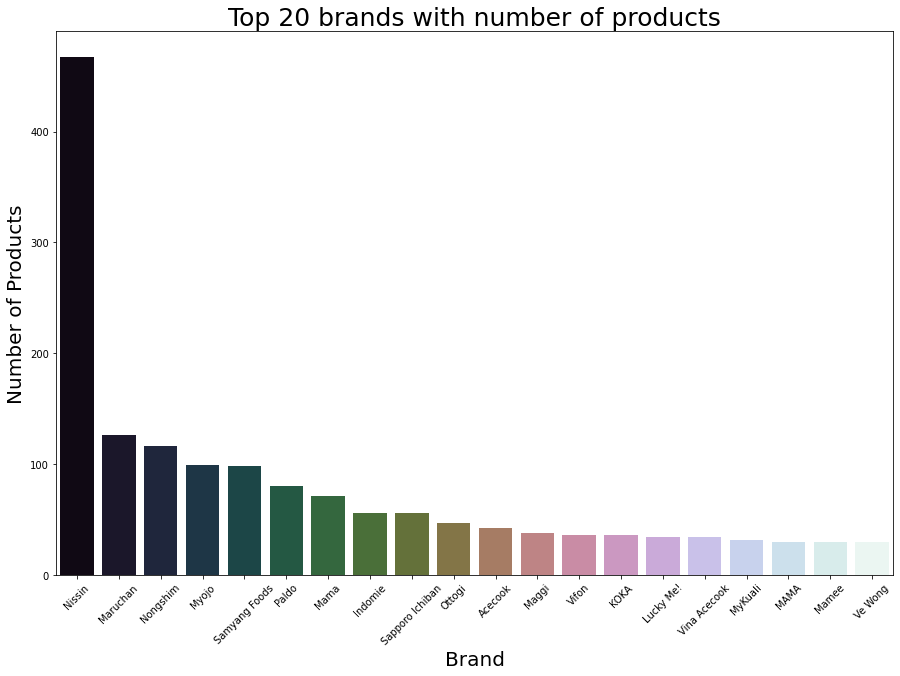

In [16]:
top_20_brands = w_data['Brand'].value_counts().sort_values(ascending=False)[:20]
ax = sns.countplot(w_data[w_data['Brand'].isin(top_20_brands.index)]['Brand'],order = top_20_brands.index,
                  palette="cubehelix")
ax.set_xticklabels([Brand_dict[int(ax.get_xticklabels()[i].get_text())] for i in range(0,20)],rotation = 45)
ax.set_title('Top 20 brands with number of products',fontsize = 25)
plt.xlabel('Brand', fontsize=20)
plt.ylabel('Number of Products', fontsize=20)
plt.show()

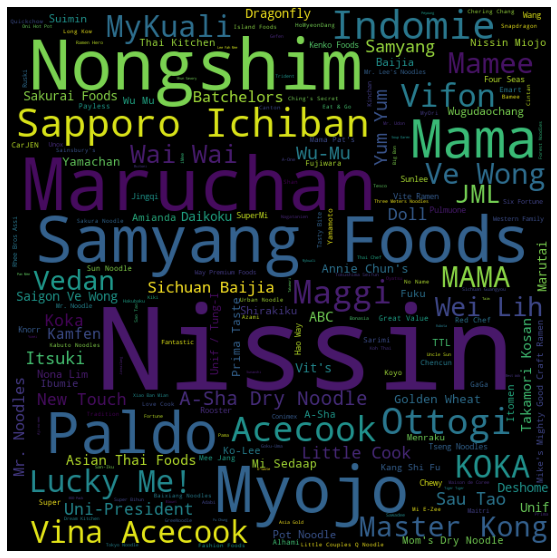

In [23]:
r_data_new = pd.read_csv('/kaggle/input/ramen-ratings-latest-update-jan-25-2020/Ramen_ratings_2020.csv')
brand_column = r_data_new.Brand

words_dict = {}
for i in range(0, len(brand_column)):
        word = brand_column[i]
        if word not in words_dict:
            words_dict[word] = 0
        words_dict[word] += 1       

plt.imshow(WordCloud(width=600, height=600).generate_from_frequencies(words_dict), interpolation='hermite')
_ = plt.axis("off")

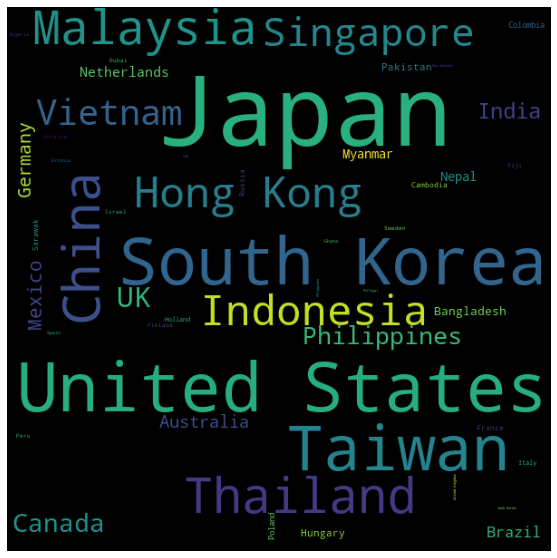

In [24]:
country_column = r_data_new.Country

words_dict = {}
for i in range(0, len(country_column)):
        word = country_column[i]
        if word not in words_dict:
            words_dict[word] = 0
        words_dict[word] += 1       

plt.imshow(WordCloud(width=600, height=600).generate_from_frequencies(words_dict), interpolation='hermite')
_ = plt.axis("off")

In [18]:
meats = pd.get_dummies(w_data['Meat_Type'])
meats = meats.rename(meat_type_dict,axis=1)
w_data = w_data.join(meats[1:])
w_data.drop('Meat_Type',axis=1,inplace=True)

style_ohe = pd.get_dummies(org_data.Style).drop(columns=['Tray'])
w_data = pd.concat([w_data,style_ohe],axis=1)

fig = make_subplots(rows=1, cols=1,shared_xaxes=True,subplot_titles=('Perason Correaltion',''))

sd_data = w_data.copy()

s_val =sd_data.corr('pearson')
s_idx = s_val.index
s_col = s_val.columns
s_val = s_val.values
fig.add_trace(
    go.Heatmap(x=s_col,y=s_idx,z=s_val,xgap=1,ygap=1,colorscale='RdYlBu'),
    row=1, col=1
)

fig.update_layout(height=800, width=1000, title_text="Correaltion Between Diversity Features")
fig.show()